In [2]:
import os
import random
import urllib
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.model import *
from lib.layers import *
from lib.optimizers import *
from lib.activations import *
from lib.dataset import ImageClassificationDataset
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical

In [3]:
URL = 'https://balintdaniel.com/cloud/index.php/s/ZTMfTmKyj7y5XTJ/download?path=%2Fdatasets&files=binary_classification_dataset.zip'
FILE = 'binary_classification_dataset.zip'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall("./")
print('Done!')

Unzipping images...
Done!


In [7]:
dataset = ImageClassificationDataset()
dataset.load("binary_classification_dataset", size=28, binary=True)
dataset.augment()
dataset.balance()
dataset.preprocess(
     white_balance = True     
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()

Train batch contains 9_800 images
Validation batch contains 2_800 images
Test batch contains 1_400 images


/home/deni/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


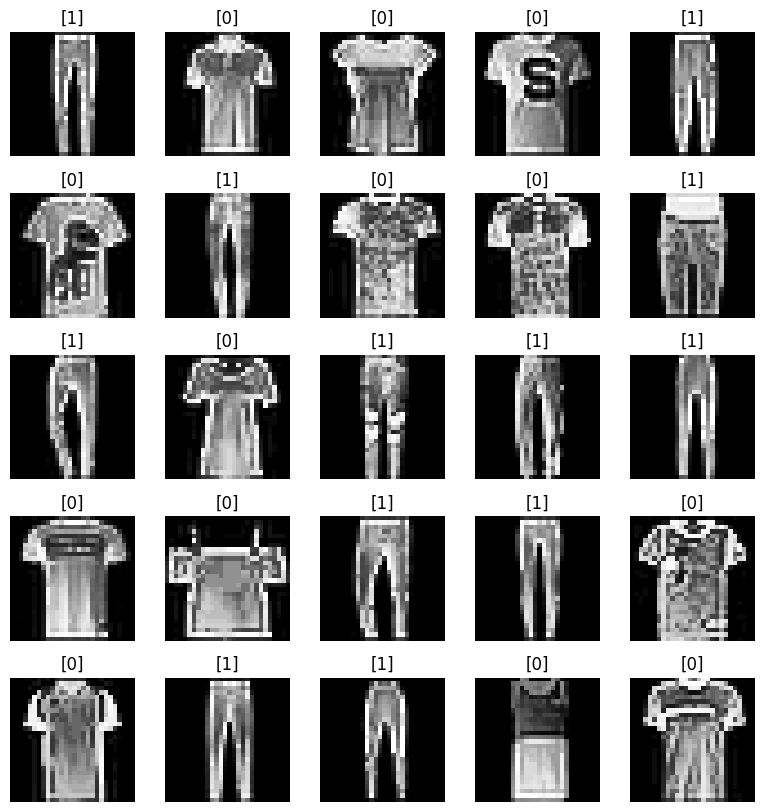

In [8]:
dataset.visualize_dataset_preview()

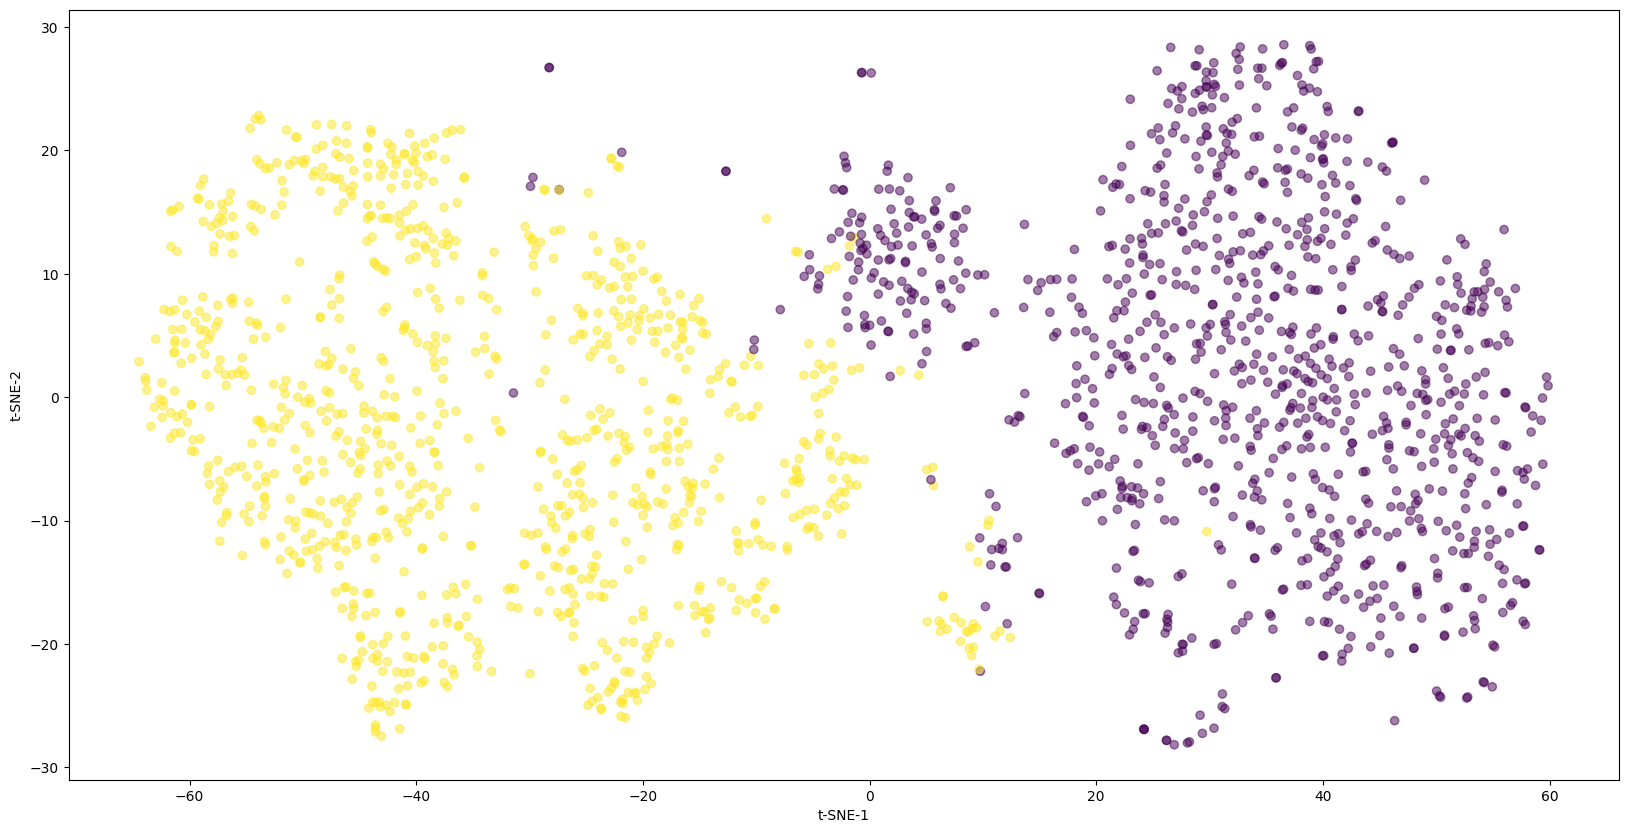

In [9]:
dataset.visualize_dataset()

In [10]:
# EZ MÉG NEM BINARY


model = Model()

model.add(Layer_Dense(X_train.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 1))
model.add(Activation_Sigmoid())

model.set(
    loss=Loss_BinaryCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=0.001),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=20, 
    batch_size=128,
    early_stop=5
)

Epoch(1/20), Training:   accuracy: 64.142, loss: 0.164, learning rate: 0.000929368029740, data loss: 0.100, regularization loss: 0.0655
Epoch(1/20), Validation: accuracy: 63.463,loss: 0.027

Epoch(2/20), Training:   accuracy: 64.065, loss: 0.093, learning rate: 0.000867302688638, data loss: 0.039, regularization loss: 0.0544
Epoch(2/20), Validation: accuracy: 63.554,loss: 0.025

Epoch(3/20), Training:   accuracy: 64.078, loss: 0.075, learning rate: 0.000813008130081, data loss: 0.028, regularization loss: 0.0477
Epoch(3/20), Validation: accuracy: 63.600,loss: 0.023

Epoch(4/20), Training:   accuracy: 64.045, loss: 0.065, learning rate: 0.000765110941086, data loss: 0.022, regularization loss: 0.0422
Epoch(4/20), Validation: accuracy: 63.686,loss: 0.023

Epoch(5/20), Training:   accuracy: 64.032, loss: 0.055, learning rate: 0.000722543352601, data loss: 0.016, regularization loss: 0.0388
Epoch(5/20), Validation: accuracy: 63.366,loss: 0.020

Epoch(6/20), Training:   accuracy: 63.875, lo

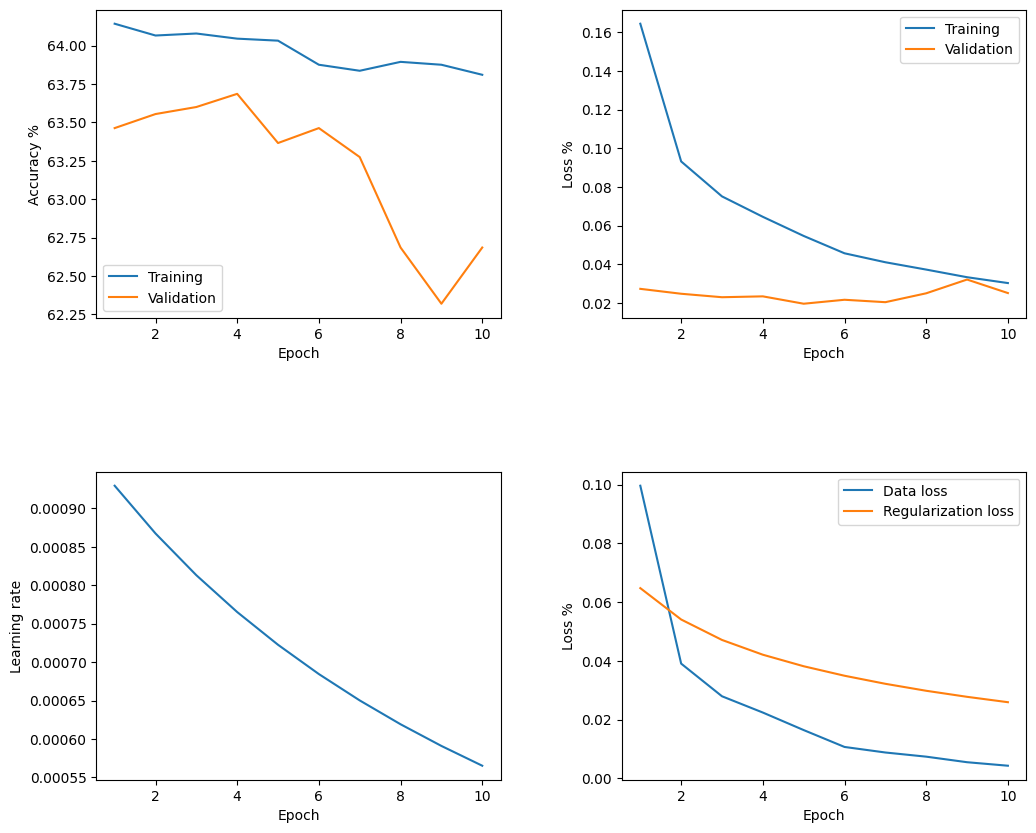

In [11]:
model.visualize_train()

In [12]:
model.evaluate(X_test, y_test) # Use test set

Evaluation: accuracy: 706.000, loss: 0.021


In [35]:
model.save("model.m")
model = Model.load("model.m")

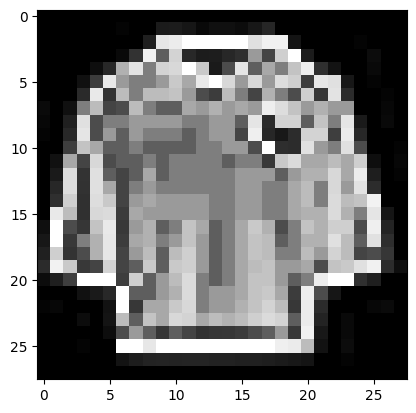

Prediction: [0], True: [0]
T-shirt/top


In [19]:
fashion_mnist_labels = {   
    0: 'T-shirt/top',
    1: 'Trouser'
}

img = random.randint(0, len(X_test)-1) # Random image from test batch

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction[0]])